In [273]:
import pandas as pd
pd.set_option('display.max_column',None)

In [274]:
data = pd.read_csv(r'C:\Users\HP\Desktop\Python\Vs_Python\Projects\Churn_prediction\NoteBook\WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [275]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [276]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [277]:
data.dropna(inplace=True)

In [278]:
data.shape

(7032, 21)

In [279]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [280]:
data.drop(columns=['gender','customerID','PhoneService','tenure'],inplace=True)

In [281]:
data.head()

,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,No,No,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,0,No,No,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,No,No,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [282]:
df = data.copy()

In [283]:
num_var = df.select_dtypes(include=['int','float']).columns.tolist()

In [284]:
import seaborn as sns

In [285]:
corr_matrix = df[num_var].corr()

<Axes: >

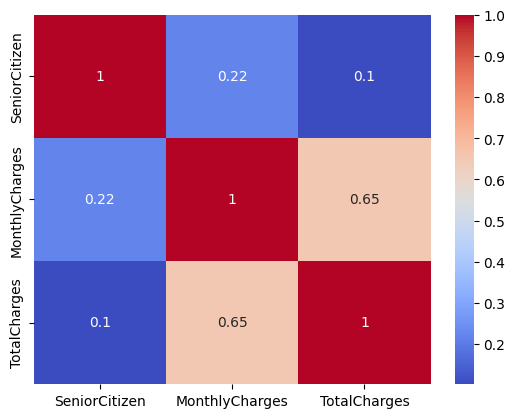

In [286]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [287]:
df = pd.get_dummies(data = df,columns=['InternetService','Contract','PaymentMethod','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','MultipleLines'], drop_first=False, dtype='int')

In [288]:
con_var = df.select_dtypes(include='object').columns.tolist()

In [289]:
con_var

['Partner', 'Dependents', 'PaperlessBilling', 'Churn']

OnlineSecurity                             1520
OnlineBackup                               1520
DeviceProtection                           1520
TechSupport                                1520
StreamingTV                                1520
StreamingMovies

In [290]:
for i in con_var:
    df[i] = df[i].map({'Yes': 1, 'No': 0})

In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7032 non-null   int64  
 1   Partner                                  7032 non-null   int64  
 2   Dependents                               7032 non-null   int64  
 3   PaperlessBilling                         7032 non-null   int64  
 4   MonthlyCharges                           7032 non-null   float64
 5   TotalCharges                             7032 non-null   float64
 6   Churn                                    7032 non-null   int64  
 7   InternetService_DSL                      7032 non-null   int32  
 8   InternetService_Fiber optic              7032 non-null   int32  
 9   InternetService_No                       7032 non-null   int32  
 10  Contract_Month-to-month                  7032 non-nul

In [292]:
from sklearn.preprocessing import PowerTransformer, StandardScaler

In [293]:
PT = PowerTransformer(method='yeo-johnson')

df['TotalCharges'] = PT.fit_transform(df[['TotalCharges']])

In [296]:
std_convert=['MonthlyCharges']

In [297]:
for i in std_convert:
    SS= StandardScaler()
    df[i] = SS.fit_transform(df[[i]])


In [298]:
df

,SeniorCitizen,Partner,Dependents,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes
0,0,1,0,1,-1.161694,-1.810069,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
1,0,0,0,0,-0.260878,0.254257,0,1,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0
2,0,0,0,1,-0.363923,-1.386091,1,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
3,0,0,0,0,-0.747850,0.233220,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0
4,0,0,0,1,0.196178,-1.248808,1,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,1,0.664868,0.296583,0,1,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1
7039,0,1,1,1,1.276493,1.565846,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1
7040,0,1,1,1,-1.170004,-0.858393,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
7041,1,1,0,1,0.319168,-0.921477,1,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1


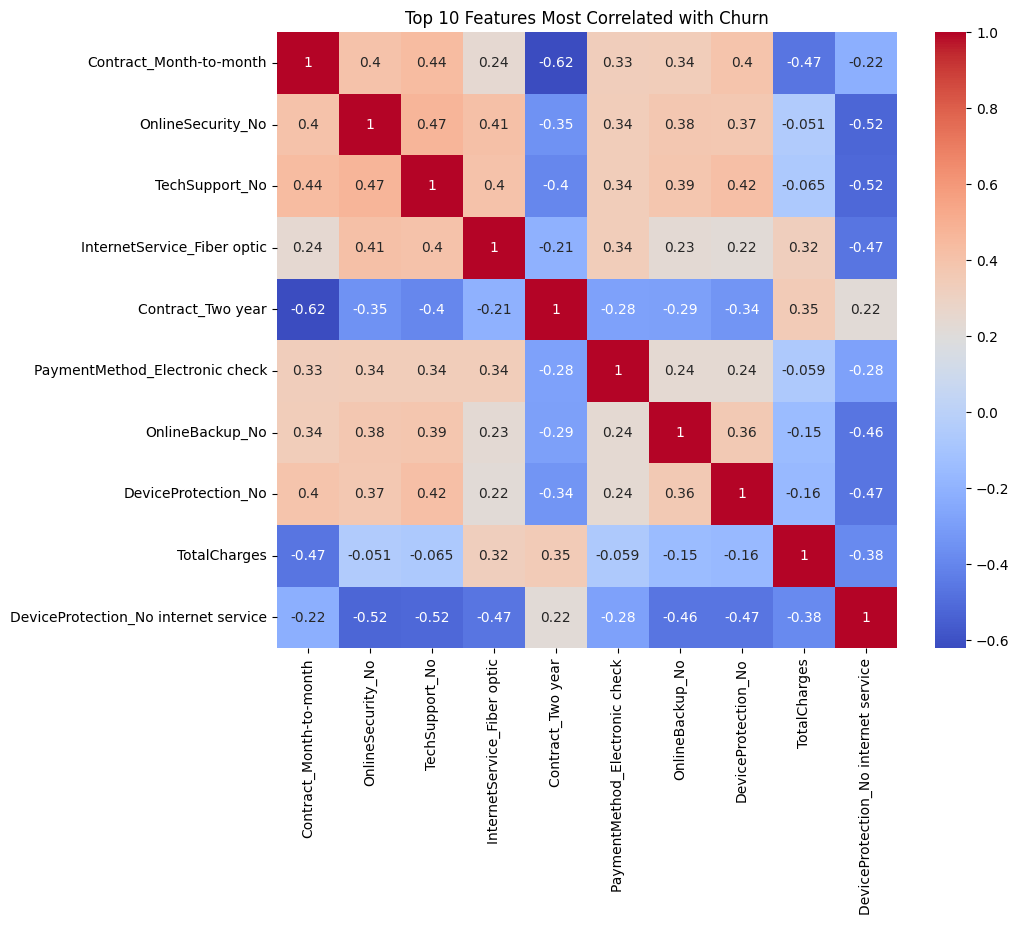

In [311]:
top_corr_features = df.corr()['Churn'].abs().sort_values(ascending=False)[1:11].index
plt.figure(figsize=(10, 8))
sns.heatmap(df[top_corr_features].corr(), annot=True, cmap='coolwarm')
plt.title("Top 10 Features Most Correlated with Churn")
plt.show()


In [299]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [300]:
from sklearn.model_selection import  train_test_split
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((5625, 37), (1407, 37))

In [301]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve 

In [302]:

def evaluate_clf(true, predicted):
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc

In [303]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "AdaBoost Classifier": AdaBoostClassifier()
}

In [304]:
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
    models_list = []
    accuracy_list = []
    auc= []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred)


        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        accuracy_list.append(model_test_accuracy)
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        auc.append(model_test_rocauc_score)
        print('='*35)
        print('\n')
        
    report=pd.DataFrame(list(zip(models_list, accuracy_list)), columns=['Model Name', 'Accuracy']).sort_values(by=['Accuracy'], ascending=False)
        
    return report

In [305]:
base_model_report =evaluate_models(X=X, y=y, models=models)

Random Forest
Model performance for Training set
- Accuracy: 0.9972
- F1 score: 0.9946
- Precision: 0.9946
- Recall: 0.9946
- Roc Auc Score: 0.9964
----------------------------------
Model performance for Test set
- Accuracy: 0.7775
- F1 score: 0.5349
- Precision: 0.6020
- Recall: 0.4813
- Roc Auc Score: 0.6830


Decision Tree
Model performance for Training set
- Accuracy: 0.9973
- F1 score: 0.9950
- Precision: 0.9973
- Recall: 0.9926
- Roc Auc Score: 0.9958
----------------------------------
Model performance for Test set
- Accuracy: 0.7242
- F1 score: 0.4895
- Precision: 0.4819
- Recall: 0.4973
- Roc Auc Score: 0.6519


Gradient Boosting
Model performance for Training set
- Accuracy: 0.8313
- F1 score: 0.6481
- Precision: 0.7271
- Recall: 0.5846
- Roc Auc Score: 0.7526
----------------------------------
Model performance for Test set
- Accuracy: 0.7889
- F1 score: 0.5493
- Precision: 0.6351
- Recall: 0.4840
- Roc Auc Score: 0.6916


Logistic Regression
Model performance for Training 

In [306]:

base_model_report

,Model Name,Accuracy
3,Logistic Regression,0.793177
6,AdaBoost Classifier,0.791756
5,Support Vector Classifier,0.789623
2,Gradient Boosting,0.788913
0,Random Forest,0.777541
4,K-Neighbors Classifier,0.766880
1,Decision Tree,0.724236


In [307]:
Log_param = {
        'penalty': ['l1', 'l2'],
        'C': [0.01, 0.1, 1, 10, 100]
    }


Grad_params = {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 4, 5],
        'subsample': [0.8, 1.0]
    }

SVC_params = {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    }

In [308]:
randomcv_models = [
    ("Logistic Regression",LogisticRegression(),Log_param),
    ("Gradient Boosting", GradientBoostingClassifier(),Grad_params),
    ("Support Vector Classifier", SVC(), SVC_params)
]

In [309]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2, 
                                   n_jobs=-1)
    random.fit(X, y)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 10 candidates, totalling 30 fits


c:\Users\HP\Desktop\Python\Vs_Python\Projects\Churn_prediction\CP_venv\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 10 is smaller than n_iter=100. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\HP\Desktop\Python\Vs_Python\Projects\Churn_prediction\CP_venv\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\HP\Desktop\Python\Vs_Python\Projects\Churn_prediction\CP_venv\lib\site-packages\sklearn\model_selection\_validation.py", line 729, 

Fitting 3 folds for each of 36 candidates, totalling 108 fits


KeyboardInterrupt: 

In [ ]:
model_param

{'Logistic Regression': {'penalty': 'l2', 'C': 0.1},
 'Gradient Boosting': {'subsample': 1.0,
  'n_estimators': 200,
  'max_depth': 5,
  'learning_rate': 0.01},
 'Support Vector Classifier': {'kernel': 'rbf', 'gamma': 'auto', 'C': 10}}

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve
best_models = {
    "Logistic Regression": LogisticRegression(**model_param['Logistic Regression']),
    "Gradient Boosting": GradientBoostingClassifier(**model_param['Gradient Boosting']),
    "Support Vector Classifier": SVC(**model_param['Support Vector Classifier'])
}
tuned_report =evaluate_models(X=X, y=y, models=best_models)




Logistic Regression
Model performance for Training set
- Accuracy: 0.8112
- F1 score: 0.6037
- Precision: 0.6827
- Recall: 0.5411
- Roc Auc Score: 0.7250
----------------------------------
Model performance for Test set
- Accuracy: 0.7918
- F1 score: 0.5499
- Precision: 0.6462
- Recall: 0.4786
- Roc Auc Score: 0.6919


Gradient Boosting
Model performance for Training set
- Accuracy: 0.8276
- F1 score: 0.6303
- Precision: 0.7325
- Recall: 0.5532
- Roc Auc Score: 0.7400
----------------------------------
Model performance for Test set
- Accuracy: 0.7896
- F1 score: 0.5316
- Precision: 0.6512
- Recall: 0.4492
- Roc Auc Score: 0.6810


Support Vector Classifier
Model performance for Training set
- Accuracy: 0.8197
- F1 score: 0.6159
- Precision: 0.7100
- Recall: 0.5438
- Roc Auc Score: 0.7317
----------------------------------
Model performance for Test set
- Accuracy: 0.7910
- F1 score: 0.5477
- Precision: 0.6449
- Recall: 0.4759
- Roc Auc Score: 0.6905




In [ ]:
tuned_report

,Model Name,Accuracy
0,Logistic Regression,0.791756
2,Support Vector Classifier,0.791045
1,Gradient Boosting,0.789623


In [ ]:

best_model = LogisticRegression(**model_param['Logistic Regression'])
best_model = best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)
score = accuracy_score(y_test,y_pred)
cr = classification_report(y_test,y_pred)

print("FINAL MODEL 'KNN'")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

FINAL MODEL 'KNN'
Accuracy Score value: 0.7918
              precision    recall  f1-score   support

           0       0.83      0.91      0.86      1033
           1       0.65      0.48      0.55       374

    accuracy                           0.79      1407
   macro avg       0.74      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



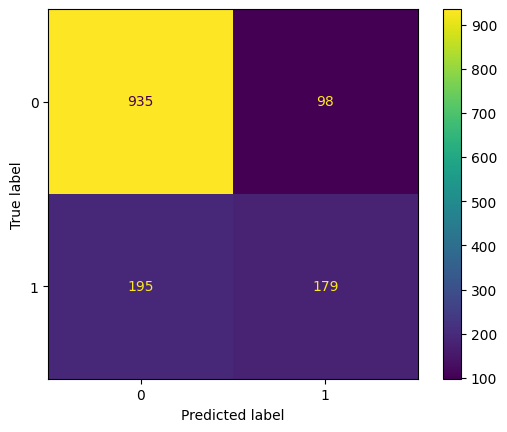

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)